# 1. Geometry test

# 2. Digitizer

./simulation -m ../tests/mathusla40/run_parma_mathusla40.mac

Run digitizer

./digitizer data/run_0.root -p 100

In [21]:
import sys, os
import importlib
# importlib.import_module(module_name)
sys.path.append("../..")

import matplotlib.pyplot as plt
import numpy as np

from muhelper import root

In [2]:
fname_raw = "../../build/data/run_0.root"
fname_digi = "../../build/data/run_0.digi.root"

In [130]:
f1 = root.tfile(fname_raw)
f1.ls()
f1.get_tree("raw")
# f1.ls_tree()
# f1.get_entry(0)

f2 = root.tfile(fname_digi)
f2.ls()
f2.get_tree("digi")


None
None


TFile**		../../build/data/run_0.root	
 TFile*		../../build/data/run_0.root	
  KEY: TTree	raw;1	raw
  KEY: TTree	metadata;1	Simulation metadata
TFile**		../../build/data/run_0.digi.root	
 TFile*		../../build/data/run_0.digi.root	
  KEY: TTree	metadata;1	Metadata for digitization
  KEY: TTree	digi;1	Digitized Tree


In [131]:
def split_list(input_list, delimiter = -1):
    result = []
    current_sublist = []

    for value in input_list:
        if value == delimiter:
            # When -1 is encountered, append the current sublist to result and reset the sublist
            if current_sublist:
                result.append(current_sublist)
            current_sublist = []
        else:
            # Add value to the current sublist
            current_sublist.append(value)
    
    # Don't forget to append the last sublist if it has any values
    if current_sublist:
        result.append(current_sublist)

    return result
    
def process_digi(data):
    data["Digi_hitInds_split"] = split_list(data["Digi_hitInds"], delimiter=-1)

In [132]:
keys = ["residual_x", "residual_y", "residual_z", "direction"] 
res = {key:[] for key in keys}


for i in range(f1.entries):
# for i in [2]:
    
    data_raw = f1.get_entry(i)
    data_digi = f2.get_entry(i)

    process_digi(data_digi)

    for j in range(len(data_digi["Digi_x"])):
        raw_ind = data_digi["Digi_hitInds_split"][j][0]
        res["residual_x"].append(data_digi["Digi_x"][j] - data_raw["Hit_x"][raw_ind])
        res["residual_y"].append(data_digi["Digi_y"][j] - data_raw["Hit_y"][raw_ind])
        res["residual_z"].append(data_digi["Digi_z"][j] - data_raw["Hit_z"][raw_ind])
        res["direction"].append(data_digi["Digi_direction"][j])
        if abs(res["residual_z"][-1])>1000:
            print(data_digi["Digi_z"][j], data_raw["Hit_z"][raw_ind], data_digi["Digi_detectorID"][j])


for key in res:
    res[key] = np.array(res[key])

In [116]:
np.unique(res["direction"])

array([ 12, 102, 120, 210])

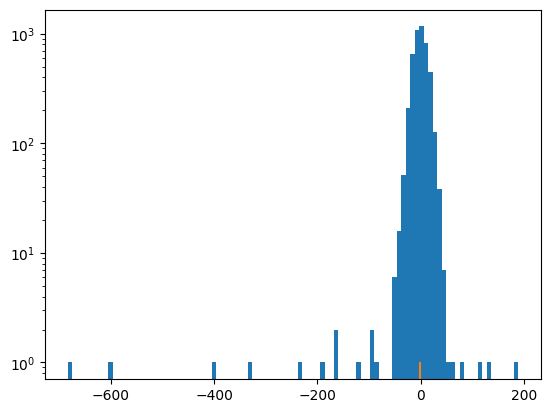

In [135]:
mask = res["direction"] == 210
var= 'residual_x'
plt.hist(res[var], bins=100);
plt.hist(res[var][mask], bins=100);
plt.yscale("log")

In [12]:
print(f2.tree.Digi_detectorID)

{ 500500393, 500400166, 500300391, 500200124, 500100131, 500000081, 100000304390, 100000204731, 100000303123, 500500648, 500400174, 500300379, 500200407, 500100372 }


In [15]:
data_digi.keys()

dict_keys(['Digi_x', 'Digi_y', 'Digi_z', 'Digi_t', 'Digi_edep', 'Digi_trackID', 'Digi_pdgID', 'Digi_detectorID', 'Digi_type', 'Digi_hitInds', 'Digi_direction'])

In [35]:
# data_raw["Hit_x"],data_raw["Hit_y"]#, data_raw["Hit_z"], data_raw["Hit_detectorID"]

In [92]:
data_digi

{'Digi_x': [-6903.89208984375,
  -7817.5,
  -9707.5,
  -21611.19921875,
  -22411.19921875],
 'Digi_y': [-8132.5,
  -7326.1357421875,
  -5715.63818359375,
  4217.5,
  4900.59912109375],
 'Digi_z': [15633.599609375,
  14833.599609375,
  13233.599609375,
  2850.881591796875,
  87.5],
 'Digi_t': [-303.5856018066406,
  -299.8329162597656,
  -290.6226501464844,
  -226.97994995117188,
  -224.97694396972656],
 'Digi_edep': [3.2099850177764893,
  3.145004987716675,
  3.3647079467773438,
  2.4782493114471436,
  7.796252250671387],
 'Digi_trackID': [1, 1, 1, 1, 1],
 'Digi_pdgID': [13, 13, 13, 13, 13],
 'Digi_detectorID': [500400048,
  500300198,
  500100252,
  100000103180,
  100000002892],
 'Digi_type': [0, 0, 0, 0, 0],
 'Digi_hitInds': [0,
  -1,
  1,
  -1,
  2,
  -1,
  3,
  -1,
  4,
  5,
  8,
  7,
  6,
  9,
  10,
  11,
  12,
  13,
  14,
  -1],
 'Digi_direction': [12, 102, 102, 210, 120]}

In [77]:
f2.tree.Digi_detectorID

vector<Long64_t>{ 1216053862, 1215953168, 1215953178 }